In [1]:
import gensim
import os
from distutils.version import LooseVersion, StrictVersion
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import re

In [2]:
from gensim.models import Word2Vec

In [3]:
modelwv = Word2Vec.load("W2Vmodel.bin")

In [4]:
print(modelwv.wv['việt_nam'])

[ 6.26405001e-01  1.74230742e+00  3.39452446e-01  1.61769605e+00
  1.24599099e+00 -2.02257950e-02  5.18159628e-01  1.30082703e+00
 -2.85692406e+00 -3.14036727e+00  2.32057047e+00  3.97005647e-01
 -9.05862093e-01 -3.42936611e+00 -1.82856247e-01 -6.39763594e-01
 -1.15834877e-01  2.95627415e-01 -2.05692124e+00 -2.60721350e+00
  5.18661976e-01  9.42185879e-01  1.13166952e+00  7.10537955e-02
 -8.10626328e-01  7.83423986e-03 -9.31980275e-03  1.07196820e+00
  4.08221900e-01  8.40779722e-01 -1.13034034e+00  4.34210688e-01
  1.75909960e+00 -7.35302746e-01  4.71670330e-01 -3.96348417e-01
 -2.99143600e+00  5.01955152e-01  1.88820612e+00  3.34713534e-02
 -1.44530201e+00 -7.11900771e-01  1.67841315e-01  1.07969336e-01
 -1.47908533e+00  1.09683120e+00  6.96572736e-02  1.01172078e+00
 -1.86869586e+00 -6.56652749e-01  2.12696418e-01  6.86233938e-01
  2.24882865e+00 -8.96076500e-01  6.48067236e-01 -6.34592056e-01
 -4.80282992e-01  8.45142186e-01 -4.42703635e-01 -8.92698944e-01
 -1.40377712e+00  2.96891

In [5]:
modelwv.wv.most_similar('việt_nam', topn=5)

[('hàn_quốc', 0.5629851222038269),
 ('campuchia', 0.5471175909042358),
 ('việt', 0.5427928566932678),
 ('singapore', 0.491588294506073),
 ('asean', 0.49015307426452637)]

In [6]:
len(modelwv.wv)

137183

In [7]:
data = pd.read_csv('data_after.csv')

In [8]:
data.head()

,Unnamed: 0,text,lable,word_length
0,0,cháy căn_hộ nhà_tầng sài_gòn lửa cháy dữ_dội c...,Chinhtrixahoi,179
1,1,chủ xe cá_nhân có_thể xác_nhận điện_tử giãn ch...,Chinhtrixahoi,283
2,2,xây bãi xe_ngầm tầng sân golf trung_tâm đà lạt...,Chinhtrixahoi,207
3,3,bộ_đội việt_nam phát_hiện vị_trí dấu_hiệu sống...,Chinhtrixahoi,260
4,4,đường võ chí công hoàn_thành xe_khách chạy quả...,Chinhtrixahoi,527


In [9]:
len(modelwv.wv)

137183

In [10]:
vocab=list(modelwv.wv.index_to_key)

In [11]:
word_vec_dict={}
for word in vocab:
  word_vec_dict[word]=modelwv.wv[word]
print("The no of key-value pairs : ",len(word_vec_dict))

The no of key-value pairs :  137183


In [12]:
maxi=-1
for i,rev in enumerate(data['text']):
    tokens=rev.split()
    if(len(tokens)>maxi):
        maxi=len(tokens)
print(maxi)

3677


In [13]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
lable_types = ('Chinhtrixahoi','Doisong','Khoahoc','Kinhdoanh','Phapluat','Suckhoe','Thegioi','Thethao','Giaitri','Sohoa')
lable_df = pd.DataFrame(lable_types, columns=['lable'])
labelencoder = LabelEncoder()
data['new_lable'] = labelencoder.fit_transform(data['lable'])
data

,Unnamed: 0,text,lable,word_length,new_lable
0,0,cháy căn_hộ nhà_tầng sài_gòn lửa cháy dữ_dội c...,Chinhtrixahoi,179,0
1,1,chủ xe cá_nhân có_thể xác_nhận điện_tử giãn ch...,Chinhtrixahoi,283,0
2,2,xây bãi xe_ngầm tầng sân golf trung_tâm đà lạt...,Chinhtrixahoi,207,0
3,3,bộ_đội việt_nam phát_hiện vị_trí dấu_hiệu sống...,Chinhtrixahoi,260,0
4,4,đường võ chí công hoàn_thành xe_khách chạy quả...,Chinhtrixahoi,527,0
...,...,...,...,...,...
44605,48893,hlv srimaka thái lan đối_thủ sea games hlv wor...,Thethao,194,9
44606,48894,cụ nước_rút ngoạn_mục vô_địch thế_giới lanvđv ...,Thethao,187,9
44607,48895,cầu_thủ indonesia khóc quyền dự world_cup indo...,Thethao,239,9
44608,48896,alcaraz_đấu sinner bán_kết miami open mỹcarlos...,Thethao,191,9


In [14]:
import keras
from keras.preprocessing.text import one_hot,Tokenizer
from keras_preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split,cross_validate
from keras.models import Sequential
from keras.layers import Dense , Flatten ,Embedding,Input,CuDNNLSTM,LSTM
from keras.models import Model
from keras.preprocessing.text import text_to_word_sequence

In [15]:
tok = Tokenizer()
tok.fit_on_texts(data['text'])
vocab_size = len(tok.word_index) + 1
encd_rev = tok.texts_to_sequences(data['text'])

In [16]:
vocab_size

87767

In [17]:
max_rev_len=3677  # max lenght of a review
vocab_size = len(tok.word_index) + 1  # total no of words
embed_dim=300 # embedding dimension as choosen in word2vec constructor

In [18]:
pad_rev= pad_sequences(encd_rev, maxlen=max_rev_len, padding='post')
pad_rev.shape 

(44610, 3677)

In [19]:
pad_rev[0]

array([894, 592, 321, ...,   0,   0,   0])

In [20]:
embed_matrix=np.zeros(shape=(vocab_size,embed_dim))
for word,i in tok.word_index.items():
  embed_vector=word_vec_dict.get(word)
  if embed_vector is not None:  # word is in the vocabulary learned by the w2v model
    embed_matrix[i]=embed_vector

In [21]:
embed_matrix.shape

(87767, 300)

In [22]:
Y=keras.utils.to_categorical(data['new_lable'])
x_train,x_test,y_train,y_test=train_test_split(pad_rev,Y,test_size=0.20,random_state=42)

In [23]:
Y.shape

(44610, 10)

In [24]:
from keras.initializers import Constant
from keras.layers import ReLU
from keras.layers import Dropout
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense, LSTM, Bidirectional
from keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, Dense

In [29]:
model = Sequential()
model.add(Embedding(input_dim=vocab_size,output_dim=embed_dim,input_length=max_rev_len,embeddings_initializer=Constant(embed_matrix)))
model.add(Conv1D(128, 5, activation='relu'))
model.add(MaxPooling1D(5))
model.add(Conv1D(128, 5, activation='relu'))
model.add(MaxPooling1D(5))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='sigmoid'))

In [25]:

# model=Sequential()
# model.add(Embedding(input_dim=vocab_size,output_dim=embed_dim,input_length=max_rev_len,embeddings_initializer=Constant(embed_matrix)))
# model.add(Bidirectional(LSTM(64, return_sequences=True, input_shape=(max_rev_len, ))))
# model.add(Flatten())
# model.add(Dense(10, activation='sigmoid'))

In [30]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 3677, 300)         26330100  
                                                                 
 conv1d (Conv1D)             (None, 3673, 128)         192128    
                                                                 
 max_pooling1d (MaxPooling1D  (None, 734, 128)         0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 730, 128)          82048     
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 146, 128)         0         
 1D)                                                             
                                                                 
 flatten (Flatten)           (None, 18688)            

In [31]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [32]:
model.optimizer.learning_rate

<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.001>

In [33]:
epochs=3
batch_size=64

In [34]:
history=model.fit(x_train,y_train,epochs=epochs,batch_size=batch_size,validation_data=(x_test,y_test))

Epoch 1/3
558/558 [==============================] - 4626s 8s/step - loss: 0.1166 - accuracy: 0.7743 - val_loss: 0.0688 - val_accuracy: 0.8750
Epoch 2/3
558/558 [==============================] - 4581s 8s/step - loss: 0.0546 - accuracy: 0.9034 - val_loss: 0.0613 - val_accuracy: 0.8881
Epoch 3/3
558/558 [==============================] - 4579s 8s/step - loss: 0.0371 - accuracy: 0.9338 - val_loss: 0.0657 - val_accuracy: 0.8874


In [35]:
history

In [36]:
model

In [37]:
from matplotlib import pyplot as plt

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


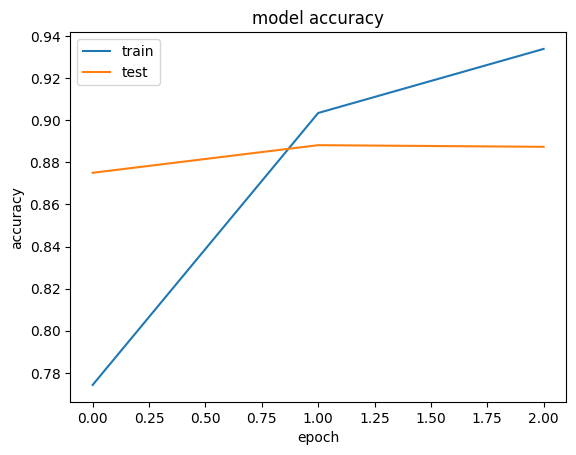

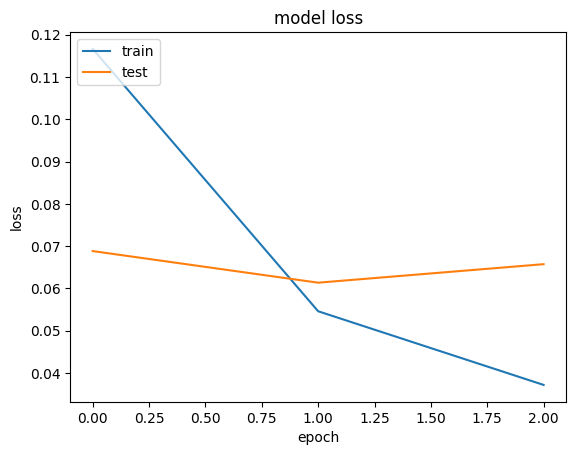

In [38]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [40]:
model.save('CNN_model.h5') 

In [41]:
from keras.models import load_model

In [42]:
model1 = load_model('CNN_model.h5')

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 31: invalid continuation byte

In [ ]:
model.evaluate(x_test,y_test)